#Preprocessed Data

Ditahap ini, kami mengimport beberapa library yang biasanya digunakan dalam pengolahan data yaitu pandas dan numpy. Kami juga mengimport Standard Scaler untuk proses normalisasi nantinya.

In [371]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Membaca file data train yaitu train.csv dan memasukkannya ke dalam dataframe 'df_train'

In [372]:
df_train = pd.read_csv('/content/train.csv')

Membaca ringkasan secara keseluruhan isi data menggunakan fungsi .info() dan .head(). Dari hal ini didapatkan bahwa:
*   Terdapat 11 kolom dengan banyak baris dengan rentang 0-54937
*   Semua baris bertipe object kecuali Id dan CO2 emission



In [373]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


In [374]:
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


Melihat jumlah nilai null dalam setiap fitur menggunakan fungsi .isnull().sum(). Dari sini didapatkan bahwa masih banyak baris di dalam fitur yang bernilai null.

In [375]:
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
dtype: int64

Mengecek duplikasi data, disini didapatkan bahwa tidak ada data yang duplikasi

In [376]:
df_duplicated=df_train[df_train.duplicated() == True]
df_duplicated

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)


Dari tahap sebelumnya, diketahui bahwa 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb' Comb bertipe object. Pada tahap ini, kami akan mengubah tipe object tersebut menjadi numerik. Lalu, dapat dilihat bahwa satuan dari ketiga fitur tersebut berbeda-beda, seperti L/10km, L/100km, mpg Imp., dan lainnya.

In [377]:
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466


Memisahkan angka dan satuan pada fitur 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb' ke dalam kolom yang berbeda untuk mempermudah pengolahan data. Satuan dari masing-masing fitur tersebut dimasukkan ke dalam kolom 'city_unit', 'hwy_unit', 'comb_unit'.

In [378]:
def split_and_add_column(df_train, column_name):
    df_train[column_name] = df_train[column_name].astype(str)
    df_train['city_unit'] = df_train[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_train[column_name] = df_train[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

In [379]:
def split_and_add_column_hwy(df_train, column_name):
    df_train[column_name] = df_train[column_name].astype(str)
    df_train['hwy_unit'] = df_train[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_train[column_name] = df_train[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

In [380]:
def split_and_add_column_comb(df_train, column_name):
    df_train[column_name] = df_train[column_name].astype(str)
    df_train['comb_unit'] = df_train[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_train[column_name] = df_train[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

Mejakankan fungsi pemisahan kolom sebelumnya dan mengubah tipe data dari 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb' menjadi float.

In [381]:
split_and_add_column(df_train, 'Fuel Consumption City')
df_train['Fuel Consumption City'] = df_train['Fuel Consumption City'].astype(float)

In [382]:
split_and_add_column_hwy(df_train, 'Fuel Consumption Hwy')
df_train['Fuel Consumption Hwy'] = df_train['Fuel Consumption Hwy'].astype(float)

In [383]:
split_and_add_column_comb(df_train, 'Fuel Consumption Comb')
df_train['Fuel Consumption Comb'] = df_train['Fuel Consumption Comb'].astype(float)

In [384]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     54937 non-null  int64  
 1   Make                   54937 non-null  object 
 2   Vehicle Class          54398 non-null  object 
 3   Engine Size(L)         53544 non-null  object 
 4   Cylinders              53739 non-null  object 
 5   Transmission           54527 non-null  object 
 6   Fuel Type              54391 non-null  object 
 7   Fuel Consumption City  52612 non-null  float64
 8   Fuel Consumption Hwy   52374 non-null  float64
 9   Fuel Consumption Comb  52385 non-null  float64
 10  CO2 Emissions(g/km)    54937 non-null  int64  
 11  city_unit              52612 non-null  object 
 12  hwy_unit               52374 non-null  object 
 13  comb_unit              52385 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.9+ 

Mengecek satuan apa saja yang terdapat pada ketiga fitur tersebut menggunakan fungsi .unique()

In [385]:
df_train['city_unit'].unique()

array(['km/L', 'km per L', 'L/10km', 'L/100km', nan, 'MPG (AS)',
       'liters per 100 km', 'mpg Imp.', 'L/100 km'], dtype=object)

In [386]:
df_train['hwy_unit'].unique()

array(['L/10km', 'L/100km', 'mpg Imp.', 'liters per 100 km', 'MPG (AS)',
       'km/L', nan, 'L/100 km', 'km per L'], dtype=object)

In [387]:
df_train['comb_unit'].unique()

array(['L/10km', 'L/100km', 'mpg Imp.', 'liters per 100 km', 'MPG (AS)',
       nan, 'km per L', 'L/100 km', 'km/L'], dtype=object)

Dari tahap sebelumnya, terdapat 8 satuan yaitu 'L/10km', 'L/100km', 'mpg Imp.', 'liters per 100 km', 'MPG (AS)', 'km per L', 'L/100 km', 'km/L'. Berdasarkan hasil riset kami, satuan yang umum digunakan dalam konsumsi bahan bakar adalah L/100 km. Oleh karena itu, kami akan mengubah semua nilai dalam kolom 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb' ke dalam satuan L/100 km.



In [388]:
def convert_to_L_per_100km(value, unit):
    value = float(value)
    if unit == 'L/100km':
        return value
    elif unit == 'L/100 km':
        return value
    elif unit == 'liters per 100 km':
        return value
    elif unit == 'MPG (AS)':
        return 235.215 / value
    elif unit == 'km per L':
        return 100 / value
    elif unit == 'km/L':
        return 100 / value
    elif unit == 'L/10km':
        return value / 10
    elif unit == 'mpg Imp.':
        return 235.215 / value
    else:
        return np.nan

In [389]:
df_train['Fuel Consumption City'] = df_train.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption City'], row['city_unit']), axis=1)
if ~df_train['city_unit'].isna().all():
    df_train['city_unit'] = 'L/100km'

In [390]:
df_train['Fuel Consumption Hwy'] = df_train.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption Hwy'], row['hwy_unit']), axis=1)
if ~df_train['hwy_unit'].isna().all():
    df_train['hwy_unit'] = 'L/100km'

In [391]:
df_train['Fuel Consumption Comb'] = df_train.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption Comb'], row['comb_unit']), axis=1)
if ~df_train['comb_unit'].isna().all():
    df_train['comb_unit'] = 'L/100km'

Dari keterangan dataset diketahui bahwa 'Fuel Consumption Comb' merupakan hasil kombinasi dari 55% 'Fuel Consumption City' dan 45% 'Fuel Consumption Hwy'. Oleh karena itu, kami mengisi baris yang memiliki nilai kosong dengan hasil perhitungan dari kombinasi tersebut.

In [392]:
condition = df_train['Fuel Consumption Comb'].isna() & ~df_train['Fuel Consumption City'].isna() & ~df_train['Fuel Consumption Hwy'].isna()
df_train.loc[condition,'Fuel Consumption Comb'] = (0.55 * df_train['Fuel Consumption City']) + 0.45 * (df_train['Fuel Consumption Hwy'])

In [393]:
condition_city = df_train['Fuel Consumption City'].isna()
df_train.loc[condition_city, 'Fuel Consumption City'] = 0.55 * df_train['Fuel Consumption Comb'].where(condition_city) / 0.55

In [394]:
condition_hwy= df_train['Fuel Consumption Hwy'].isna()
df_train.loc[condition_hwy, 'Fuel Consumption Hwy'] = 0.45 * df_train['Fuel Consumption Comb'].where(condition_hwy) / 0.45

In [395]:
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City     122
Fuel Consumption Hwy       98
Fuel Consumption Comb     218
CO2 Emissions(g/km)         0
city_unit                   0
hwy_unit                    0
comb_unit                   0
dtype: int64

In [396]:
df_train.describe()

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,54937.000000,54815.000000,54839.000000,54719.000000,54937.000000
mean,27469.000000,10.688769,7.902001,9.419433,246.688680
std,15859.090206,5.349216,3.715123,4.466398,67.571095
min,1.000000,0.042000,0.048000,0.046000,96.000000
25%,13735.000000,8.660346,6.798097,7.910000,197.000000
50%,27469.000000,10.900000,8.100000,9.643202,233.000000
75%,41203.000000,14.000000,9.900990,12.199948,290.000000
max,54937.000000,30.500000,24.080000,25.316456,522.000000


Dari tahap sebelumnya, diketahui bahwa masih ada null values dalam kolom 'Fuel Consumption City', 'Fuel Consumption Hwy', dan 'Fuel Consumption Comb'. Oleh karena itu, kami akan mengisinya dengan mean dari masing-masing kolom tersebut.

In [397]:
df_train['Fuel Consumption City']=df_train['Fuel Consumption City'].fillna(df_train['Fuel Consumption City'].mean())

In [398]:
df_train['Fuel Consumption Hwy']=df_train['Fuel Consumption Hwy'].fillna(df_train['Fuel Consumption Hwy'].mean())

In [399]:
df_train['Fuel Consumption Comb']=df_train['Fuel Consumption Comb'].fillna(df_train['Fuel Consumption Comb'].mean())

In [400]:
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City       0
Fuel Consumption Hwy        0
Fuel Consumption Comb       0
CO2 Emissions(g/km)         0
city_unit                   0
hwy_unit                    0
comb_unit                   0
dtype: int64

Menghapus kolom 'city_unit', 'hwy_unit', 'comb_unit' karene proses pemisahan nilai dan satuan dari 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb' telah selesai.

In [401]:
df_train.drop(['city_unit', 'hwy_unit', 'comb_unit'], axis=1, inplace=True)
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,0.072000,0.098000,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,13.793103,9.700000,11.960000,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,6.077907,7.406014,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,0.173000,11.700000,14.780000,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,6.577601,8.010000,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.900000,8.802817,10.505360,318
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,0.210000,0.106000,16.323040,303
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.200000,12.500000,15.630000,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.300000,9.900000,14.520000,466


In [402]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     54937 non-null  int64  
 1   Make                   54937 non-null  object 
 2   Vehicle Class          54398 non-null  object 
 3   Engine Size(L)         53544 non-null  object 
 4   Cylinders              53739 non-null  object 
 5   Transmission           54527 non-null  object 
 6   Fuel Type              54391 non-null  object 
 7   Fuel Consumption City  54937 non-null  float64
 8   Fuel Consumption Hwy   54937 non-null  float64
 9   Fuel Consumption Comb  54937 non-null  float64
 10  CO2 Emissions(g/km)    54937 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 4.6+ MB


Dari tahap sebelumnya, diketahui bahwa tipe data 'Engine Size(L)' dan 'Cylinders' seharusnya bertipe numerik bukan object. Oleh karena itu, kami akan mengubahnya menjadi numerik. Pada tahap ini, kami juga akan mengisi missing values dari kedua fitur tersebut dengan mean dari masing-masing fitur tersebut.

In [403]:
df_train['Engine Size(L)'] = pd.to_numeric(df_train['Engine Size(L)'], errors='coerce')

In [404]:
df_train['Engine Size(L)'].isnull().sum()

5264

In [405]:
df_train['Engine Size(L)'] = np.where(df_train['Engine Size(L)'] < 0, np.nan, df_train['Engine Size(L)'])
df_train['Engine Size(L)'].fillna(df_train['Engine Size(L)'].mean(), inplace=True)

In [406]:
df_train['Cylinders'] = pd.to_numeric(df_train['Cylinders'], errors='coerce')

In [407]:
df_train['Cylinders'].isnull().sum()

4523

In [408]:
df_train['Cylinders'] = np.where(df_train['Cylinders'] < 0, np.nan, df_train['Cylinders'])
df_train['Cylinders'].fillna(df_train['Cylinders'].mean(), inplace=True)

In [409]:
df_train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.500000,4.0,AV8,X,11.904762,0.072000,0.098000,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,2.978387,6.0,A5,X,13.793103,9.700000,11.960000,325
2,3,MATSUDA,COMPACT,2.000000,4.0,AS6,X,10.204082,6.077907,7.406014,170
3,4,CHEVO,VAN - PASSENGER,2.978387,8.0,A6,X,0.173000,11.700000,14.780000,362
4,5,TOYOTI,COMPACT,1.800000,4.0,M6,X,8.100000,6.577601,8.010000,180
...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.200000,8.0,AS10,Z,11.900000,8.802817,10.505360,318
54933,54934,CHEVO,SUBCOMPACT,3.600000,6.0,M6,X,0.210000,0.106000,16.323040,303
54934,54935,FOLD,TWO-SEATER,3.500000,6.0,AM7,Z,18.200000,12.500000,15.630000,410
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.200000,8.0,A8,Z,18.300000,9.900000,14.520000,466


Dari tahap sebelumnya, diketahui bahwa terdapat 4 fitur kategorikal, yaitu 'Make', 'Vehicle Class', 'Transmission', dan 'Fuel Type'. Dari keempat fitur tersebut, masih terdapat missing values. Missing values disini adalah null values ataupun yang berisi invalid values seperti 'NOTRECORDED', 'UNKNOWN', dan sebagainya. Oleh karena itu, kami akan mengubahnya dengan nilai 'NA'.

In [410]:
df_train['Make'].unique()

array(['MITSU', 'TOYOTI', 'MATSUDA', 'CHEVO', 'DOGE', 'BMV', 'LECUS',
       'KIO', 'FOLD', 'JIPU', 'NIRRAN', 'CADILUXE', 'FOLKSWA', 'BARUSU',
       'GONDA', 'LAND CRAWLER', 'RYUNDAI', 'TOLVO', 'FIAR', 'ASURA',
       'LAMBOGI'], dtype=object)

In [411]:
df_train['Vehicle Class'] = df_train['Vehicle Class'].str.replace('[^a-zA-Z\s]', '').str.upper()
invalid_values = ['MISSING', '-1', 'NOTRECORDED', 'NA', 'UNSPECIFIED', 'UNKNOWN', 'UNESTABLISHED', 'NOTAVAILABLE', '']
df_train['Vehicle Class'] = df_train['Vehicle Class'].replace(invalid_values, pd.NA)
df_train['Vehicle Class'].fillna('NA', inplace=True)

<ipython-input-411-de1e23af272c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['Vehicle Class'] = df_train['Vehicle Class'].str.replace('[^a-zA-Z\s]', '').str.upper()


In [412]:
df_train['Transmission'].unique()

array(['AV8', 'A5', 'AS6', 'A6', 'M6', 'M5', 'A9', 'AS8', 'AV', 'AM6',
       'AS10', 'A8', 'AS9', 'unestablished', 'AM8', 'AM7', 'AV7', 'A4',
       'not-recorded', 'AV6', 'missing', 'unspecified', 'AV10', 'AS5',
       'M7', 'A10', 'na', 'AS7', 'not-available', 'unknown', nan, 'A7',
       'AM9'], dtype=object)

In [413]:
transmission_na_values = ['unspecified', 'not-recorded', 'unknown', 'nan', 'missing', 'not-available', 'na', '-1', 'unestablished']
df_train['Transmission'] = df_train['Transmission'].replace(transmission_na_values, pd.NA)
df_train['Transmission'].fillna(value='NA', inplace=True)

In [414]:
df_train['Fuel Type'].unique()

array(['X', 'Z', nan, 'E', 'missing', 'not-recorded', 'not-available',
       'D', 'unspecified', 'unknown', 'na', 'unestablished', 'N'],
      dtype=object)

In [415]:
fueltype_na_values = ['NA', 'missing', 'unspecified', 'not-recorded',
       'unknown', 'unestablished', 'na', 'not-available','-1']
df_train['Fuel Type'] = df_train['Fuel Type'].replace(fueltype_na_values, pd.NA)
df_train['Fuel Type'].fillna(value='NA', inplace=True)

In [416]:
df_train.isnull().sum()

Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [417]:
df_train = df_train.dropna()

Kami membuang kolom 'Id' dikarenakan hanya berisi indeks data yang tidak mempengaruhi model prediktif

In [418]:
df_train = df_train.drop(['Id'], axis=1)

Menentukan fitur yang akan digunakan dalam prediksi

In [419]:
X_train = df_train.drop(['CO2 Emissions(g/km)'], axis=1)
y_train = df_train['CO2 Emissions(g/km)']

Kami melakukan one hot encoded pada fitur-fitur kategorikal

In [420]:
X_train = pd.get_dummies(X_train)
X_train

,Engine Size(L),Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Make_ASURA,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,...,Transmission_M5,Transmission_M6,Transmission_M7,Transmission_NA,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_NA,Fuel Type_X,Fuel Type_Z
0,1.500000,4.0,11.904762,0.072000,0.098000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.978387,6.0,13.793103,9.700000,11.960000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.000000,4.0,10.204082,6.077907,7.406014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.978387,8.0,0.173000,11.700000,14.780000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1.800000,4.0,8.100000,6.577601,8.010000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,6.200000,8.0,11.900000,8.802817,10.505360,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
54933,3.600000,6.0,0.210000,0.106000,16.323040,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
54934,3.500000,6.0,18.200000,12.500000,15.630000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54935,6.200000,8.0,18.300000,9.900000,14.520000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [421]:
X_train.to_csv('Train_Americano.csv')

Kami juga menormalisasikan data menggunakan Standard Scaler

In [422]:
from sklearn.preprocessing import StandardScaler

In [423]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Tahap preprocessing pada data telah selesai, kami melakukan hal yang sama pada dataset test.

In [424]:
df_test = pd.read_csv('/content/test.csv')

In [425]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     23545 non-null  int64 
 1   Make                   23545 non-null  object
 2   Vehicle Class          23326 non-null  object
 3   Engine Size(L)         22913 non-null  object
 4   Cylinders              23039 non-null  object
 5   Transmission           23382 non-null  object
 6   Fuel Type              23324 non-null  object
 7   Fuel Consumption City  22861 non-null  object
 8   Fuel Consumption Hwy   22824 non-null  object
 9   Fuel Consumption Comb  22857 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [426]:
df_test.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km


In [427]:
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City    684
Fuel Consumption Hwy     721
Fuel Consumption Comb    688
dtype: int64

In [428]:
df_duplicated=df_test[df_test.duplicated() == True]
df_duplicated

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb


In [429]:
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,13.33 km/L,8.98 L/100km
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X,27.04 MPG (AS),18.18 km per L,0.73 L/10km
23542,78480,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.60 L/100km,8.40 liters per 100 km,9.84 km per L
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X,9.52 km/L,0.84 L/10km,0.96 L/10km


In [430]:
def split_and_add_column(df_test, column_name):
    df_test[column_name] = df_test[column_name].astype(str)
    df_test['city_unit'] = df_test[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_test[column_name] = df_test[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

In [431]:
def split_and_add_column_hwy(df_test, column_name):
    df_test[column_name] = df_test[column_name].astype(str)
    df_test['hwy_unit'] = df_test[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_test[column_name] = df_test[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

In [432]:
def split_and_add_column_comb(df_test, column_name):
    df_test[column_name] = df_test[column_name].astype(str)
    df_test['comb_unit'] = df_test[column_name].apply(lambda x: ' '.join(str(x).split()[1:]) if pd.notna(x) and len(str(x).split()) > 1 else np.nan)
    df_test[column_name] = df_test[column_name].apply(lambda x: str(x).split()[0] if pd.notna(x) and len(str(x).split()) > 1 else np.nan)

In [433]:
split_and_add_column(df_test, 'Fuel Consumption City')
df_test['Fuel Consumption City'] = df_test['Fuel Consumption City'].astype(float)

In [434]:
split_and_add_column_hwy(df_test, 'Fuel Consumption Hwy')
df_test['Fuel Consumption Hwy'] = df_test['Fuel Consumption Hwy'].astype(float)

In [435]:
split_and_add_column_comb(df_test, 'Fuel Consumption Comb')
df_test['Fuel Consumption Comb'] = df_test['Fuel Consumption Comb'].astype(float)

In [436]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     23545 non-null  int64  
 1   Make                   23545 non-null  object 
 2   Vehicle Class          23326 non-null  object 
 3   Engine Size(L)         22913 non-null  object 
 4   Cylinders              23039 non-null  object 
 5   Transmission           23382 non-null  object 
 6   Fuel Type              23324 non-null  object 
 7   Fuel Consumption City  22504 non-null  float64
 8   Fuel Consumption Hwy   22478 non-null  float64
 9   Fuel Consumption Comb  22508 non-null  float64
 10  city_unit              22504 non-null  object 
 11  hwy_unit               22478 non-null  object 
 12  comb_unit              22508 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.3+ MB


In [437]:
df_test['city_unit'].unique()

array(['liters per 100 km', 'L/100 km', 'mpg Imp.', nan, 'km/L',
       'km per L', 'L/10km', 'L/100km', 'MPG (AS)'], dtype=object)

In [438]:
df_test['hwy_unit'].unique()

array(['liters per 100 km', 'mpg Imp.', 'MPG (AS)', 'km/L', 'km per L',
       'L/100 km', 'L/100km', 'L/10km', nan], dtype=object)

In [439]:
df_test['comb_unit'].unique()

array(['MPG (AS)', 'liters per 100 km', nan, 'L/100km', 'km/L',
       'L/100 km', 'L/10km', 'km per L', 'mpg Imp.'], dtype=object)

In [440]:
def convert_to_L_per_100km(value, unit):
    value = float(value)
    if unit == 'L/100km':
        return value
    elif unit == 'L/100 km':
        return value
    elif unit == 'liters per 100 km':
        return value
    elif unit == 'MPG (AS)':
        return 235.215 / value
    elif unit == 'km per L':
        return 100 / value
    elif unit == 'km/L':
        return 100 / value
    elif unit == 'L/10km':
        return value / 10
    elif unit == 'mpg Imp.':
        return 235.215 / value
    else:
        return np.nan

In [441]:
df_test['Fuel Consumption City'] = df_test.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption City'], row['city_unit']), axis=1)
if ~df_test['city_unit'].isna().all():
    df_test['city_unit'] = 'L/100km'

In [442]:
df_test['Fuel Consumption Hwy'] = df_test.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption Hwy'], row['hwy_unit']), axis=1)
if ~df_test['hwy_unit'].isna().all():
    df_test['hwy_unit'] = 'L/100km'

In [443]:
df_test['Fuel Consumption Comb'] = df_test.apply(lambda row: convert_to_L_per_100km(row['Fuel Consumption Comb'], row['comb_unit']), axis=1)
if ~df_test['comb_unit'].isna().all():
    df_test['comb_unit'] = 'L/100km'

In [444]:
condition = df_test['Fuel Consumption Comb'].isna() & ~df_test['Fuel Consumption City'].isna() & ~df_test['Fuel Consumption Hwy'].isna()
df_test.loc[condition,'Fuel Consumption Comb'] = (0.55 * df_test['Fuel Consumption City']) + 0.45 * (df_test['Fuel Consumption Hwy'])

In [445]:
condition_city = df_test['Fuel Consumption City'].isna()
df_test.loc[condition_city, 'Fuel Consumption City'] = 0.55 * df_test['Fuel Consumption Comb'].where(condition_city) / 0.55

In [446]:
condition_hwy= df_test['Fuel Consumption Hwy'].isna()
df_test.loc[condition_hwy, 'Fuel Consumption Hwy'] = 0.45 * df_test['Fuel Consumption Comb'].where(condition_hwy) / 0.45

In [447]:
df_test.describe()

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
count,23545.00000,23493.000000,23493.000000,23445.000000
mean,66710.00000,10.713817,7.847352,9.379805
std,6797.00038,5.298654,3.729456,4.471529
min,54938.00000,0.042000,0.047000,0.042000
25%,60824.00000,8.698780,6.700000,7.892660
50%,66710.00000,10.900000,8.099690,9.616312
75%,72596.00000,13.992564,9.900000,12.160000
max,78482.00000,30.500000,22.320000,24.750000


In [448]:
df_test['Fuel Consumption City']=df_test['Fuel Consumption City'].fillna(df_test['Fuel Consumption City'].mean())

In [449]:
df_test['Fuel Consumption Hwy']=df_test['Fuel Consumption Hwy'].fillna(df_test['Fuel Consumption Hwy'].mean())

In [450]:
df_test['Fuel Consumption Comb']=df_test['Fuel Consumption Comb'].fillna(df_test['Fuel Consumption Comb'].mean())

In [451]:
df_test.isnull().sum()

Id                         0
Make                       0
Vehicle Class            219
Engine Size(L)           632
Cylinders                506
Transmission             163
Fuel Type                221
Fuel Consumption City      0
Fuel Consumption Hwy       0
Fuel Consumption Comb      0
city_unit                  0
hwy_unit                   0
comb_unit                  0
dtype: int64

In [452]:
df_test.drop(['city_unit', 'hwy_unit', 'comb_unit'], axis=1, inplace=True)
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.200000,15.200000,14.646015
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.100000,5.412218,7.930378
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,8.494583,7.800000,9.120000
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,10.713817,8.899546,9.379805
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,8.802817,5.911410,8.040000
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X,8.980000,7.501875,8.980000
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X,8.698780,5.500550,0.073000
23542,78480,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.600000,8.400000,10.162602
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X,10.504202,0.084000,0.096000


In [453]:
df_test['Engine Size(L)'] = pd.to_numeric(df_test['Engine Size(L)'], errors='coerce')

In [454]:
df_test['Engine Size(L)'].isnull().sum()

2269

In [455]:
df_test['Engine Size(L)'] = np.where(df_test['Engine Size(L)'] < 0, np.nan, df_test['Engine Size(L)'])
df_test['Engine Size(L)'].fillna(df_test['Engine Size(L)'].mean(), inplace=True)

In [456]:
df_test['Cylinders'] = pd.to_numeric(df_test['Cylinders'], errors='coerce')

In [457]:
df_test['Cylinders'].isnull().sum()

1894

In [458]:
df_test['Cylinders'] = np.where(df_test['Cylinders'] < 0, np.nan, df_test['Cylinders'])
df_test['Cylinders'].fillna(df_test['Cylinders'].mean(), inplace=True)

In [459]:
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.000000,8.000000,AS10,X,14.200000,15.200000,14.646015
1,54939,BMV,COMPACT,2.000000,4.000000,A8,Z,9.100000,5.412218,7.930378
2,54940,JIPU,SUV - SMALL,1.300000,4.000000,A9,X,8.494583,7.800000,9.120000
3,54941,LECUS,SUV - SMALL,2.976358,4.000000,AS6,Z,10.713817,8.899546,9.379805
4,54942,BARUSU,COMPACT,2.000000,5.291118,M6,Z,8.802817,5.911410,8.040000
...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.000000,4.000000,M5,X,8.980000,7.501875,8.980000
23541,78479,CHEVO,COMPACT,1.400000,4.000000,M6,X,8.698780,5.500550,0.073000
23542,78480,KIO,SUV - SMALL,2.976358,4.000000,AS6,X,11.600000,8.400000,10.162602
23543,78481,JIPU,SUV - SMALL,2.400000,4.000000,A9,X,10.504202,0.084000,0.096000


In [460]:
df_test['Make'].unique()

array(['FOLD', 'BMV', 'JIPU', 'LECUS', 'BARUSU', 'CHEVO', 'LAND CRAWLER',
       'TOLVO', 'RYUNDAI', 'LAMBOGI', 'KIO', 'TOYOTI', 'ASURA', 'MITSU',
       'DOGE', 'CADILUXE', 'GONDA', 'MATSUDA', 'NIRRAN', 'FOLKSWA',
       'FIAR'], dtype=object)

In [461]:
df_test['Vehicle Class'].unique()

array(['PICKUP TRUCK - STANDARD', 'COMPACT', 'SUV - SMALL', 'TWO-SEATER',
       'SUV - STANDARD', 'MID-SIZE', 'unknown', 'FULL-SIZE', 'SUBCOMPACT',
       nan, 'STATION WAGON - SMALL', 'VAN - PASSENGER', 'not-recorded',
       'PICKUP TRUCK - SMALL', 'SPECIAL PURPOSE VEHICLE', 'not-available',
       'MINIVAN', 'MINICOMPACT', 'VAN - CARGO', 'na',
       'STATION WAGON - MID-SIZE', 'unestablished', 'unspecified',
       'missing'], dtype=object)

In [462]:
df_test['Vehicle Class'] = df_test['Vehicle Class'].str.replace('[^a-zA-Z\s]', '').str.upper()
invalid_values = ['MISSING', '-1', 'NOTRECORDED', 'NA', 'UNSPECIFIED', 'UNKNOWN', 'UNESTABLISHED', 'NOTAVAILABLE', '']
df_test['Vehicle Class'] = df_test['Vehicle Class'].replace(invalid_values, pd.NA)
df_test['Vehicle Class'].fillna('NA', inplace=True)

<ipython-input-462-c251c9a3275f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['Vehicle Class'] = df_test['Vehicle Class'].str.replace('[^a-zA-Z\s]', '').str.upper()


In [463]:
df_test['Transmission'].unique()

array(['AS10', 'A8', 'A9', 'AS6', 'M6', 'M7', 'AS8', 'A6', 'AM7', 'M5',
       'AS9', 'AV7', 'AV6', 'unspecified', 'AV', 'unestablished', 'AM6',
       'A5', 'AS7', 'unknown', 'A4', 'AV8', 'missing', 'AS5', 'A10', 'na',
       'not-recorded', 'AM8', nan, 'not-available', 'AV10', 'AM9', 'A7'],
      dtype=object)

In [464]:
transmission_na_values = ['unspecified', 'not-recorded', 'unknown', 'nan', 'missing', 'not-available', 'na', '-1', 'unestablished']
df_test['Transmission'] = df_test['Transmission'].replace(transmission_na_values, pd.NA)
df_test['Transmission'].fillna(value='NA', inplace=True)

In [465]:
df_test['Fuel Type'].unique()

array(['X', 'Z', 'D', 'na', 'E', 'not-recorded', 'unknown', 'unspecified',
       'missing', nan, 'not-available', 'unestablished', 'N'],
      dtype=object)

In [466]:
fueltype_na_values = ['NA', 'missing', 'unspecified', 'not-recorded', 'unknown', 'unestablished', 'na', 'not-available','-1']
df_test['Fuel Type'] = df_test['Fuel Type'].replace(fueltype_na_values, pd.NA)
df_test['Fuel Type'].fillna(value='NA', inplace=True)

In [467]:
df_test.isnull().sum()

Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
dtype: int64

In [468]:
test_id = df_test['Id']

In [469]:
df_test = df_test.drop(['Id'], axis=1)

In [470]:
X_test = pd.get_dummies(df_test)
X_test

,Engine Size(L),Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Make_ASURA,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,...,Transmission_M5,Transmission_M6,Transmission_M7,Transmission_NA,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_NA,Fuel Type_X,Fuel Type_Z
0,5.000000,8.000000,14.200000,15.200000,14.646015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.000000,4.000000,9.100000,5.412218,7.930378,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.300000,4.000000,8.494583,7.800000,9.120000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.976358,4.000000,10.713817,8.899546,9.379805,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.000000,5.291118,8.802817,5.911410,8.040000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,2.000000,4.000000,8.980000,7.501875,8.980000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
23541,1.400000,4.000000,8.698780,5.500550,0.073000,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
23542,2.976358,4.000000,11.600000,8.400000,10.162602,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23543,2.400000,4.000000,10.504202,0.084000,0.096000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [471]:
X_test.to_csv('Test_Americano.csv')

In [472]:
X_test_scaled = scaler.transform(X_test)

#Explanatory Data Analysis

Explanatory untuk dataset ini dilakukan setelah tahap preprocessing. Hal ini dikarenakan kebanyakan fitur yang seharusnya bertipe data numerik malah bertipe data object. Oleh karena itu, EDA baru bisa dilakukan setelah melakukan preprocess pada data.

Mengimport library yang diperlukan

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

Memasukkan file train ke dalam dataframe 'df'

Melihat ringkasan dataset melalu fungsi df_train.head(), df_rain.tail(), df_train.sample(), df_train.shape, df_train.columns, dan df_train.info().

In [474]:
df_train.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,MITSU,SUV SMALL,1.500000,4.0,AV8,X,11.904762,0.072000,0.098000,208
1,TOYOTI,PICKUP TRUCK SMALL,2.978387,6.0,A5,X,13.793103,9.700000,11.960000,325
2,MATSUDA,COMPACT,2.000000,4.0,AS6,X,10.204082,6.077907,7.406014,170
3,CHEVO,VAN PASSENGER,2.978387,8.0,A6,X,0.173000,11.700000,14.780000,362
4,TOYOTI,COMPACT,1.800000,4.0,M6,X,8.100000,6.577601,8.010000,180


In [475]:
df_train.tail()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
54932,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90,8.802817,10.505360,318
54933,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,0.21,0.106000,16.323040,303
54934,FOLD,TWOSEATER,3.5,6.0,AM7,Z,18.20,12.500000,15.630000,410
54935,CHEVO,PICKUP TRUCK STANDARD,6.2,8.0,A8,Z,18.30,9.900000,14.520000,466
54936,RYUNDAI,FULLSIZE,2.4,4.0,AS6,X,9.70,7.300279,8.620126,192


In [476]:
df_train.sample(5)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
38046,DOGE,MIDSIZE,5.700000,8.000000,M6,Z,15.903651,12.706480,16.207455,337
26966,MATSUDA,COMPACT,2.978387,4.000000,M6,X,9.800625,6.500000,6.924198,170
36463,TOYOTI,PICKUP TRUCK SMALL,4.000000,5.292379,M6,X,0.196000,0.146000,17.361111,345
19697,BMV,SUV SMALL,2.978387,6.000000,AS8,Z,0.125000,0.107000,11.690000,251
45633,MATSUDA,SUV SMALL,2.000000,4.000000,AS6,X,0.093000,6.798097,6.807959,195


In [477]:
df_train.shape

(54937, 10)

In [478]:
df_train.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'CO2 Emissions(g/km)'],
      dtype='object')

In [479]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          54937 non-null  object 
 2   Engine Size(L)         54937 non-null  float64
 3   Cylinders              54937 non-null  float64
 4   Transmission           54937 non-null  object 
 5   Fuel Type              54937 non-null  object 
 6   Fuel Consumption City  54937 non-null  float64
 7   Fuel Consumption Hwy   54937 non-null  float64
 8   Fuel Consumption Comb  54937 non-null  float64
 9   CO2 Emissions(g/km)    54937 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 4.2+ MB


Membuat visualisasi korelasi matriks untuk melihat hubungan antara fitur

<ipython-input-480-e927e063c573>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


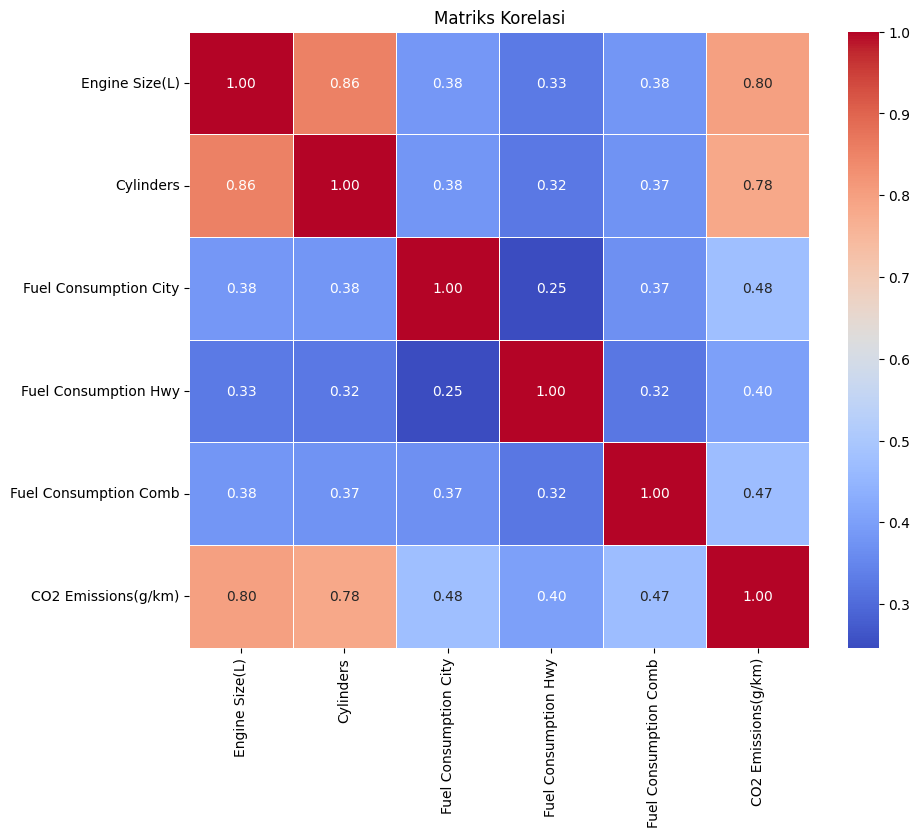

In [480]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

Melihat persebaran dan hubungan antara fitur menggunakan pair plot

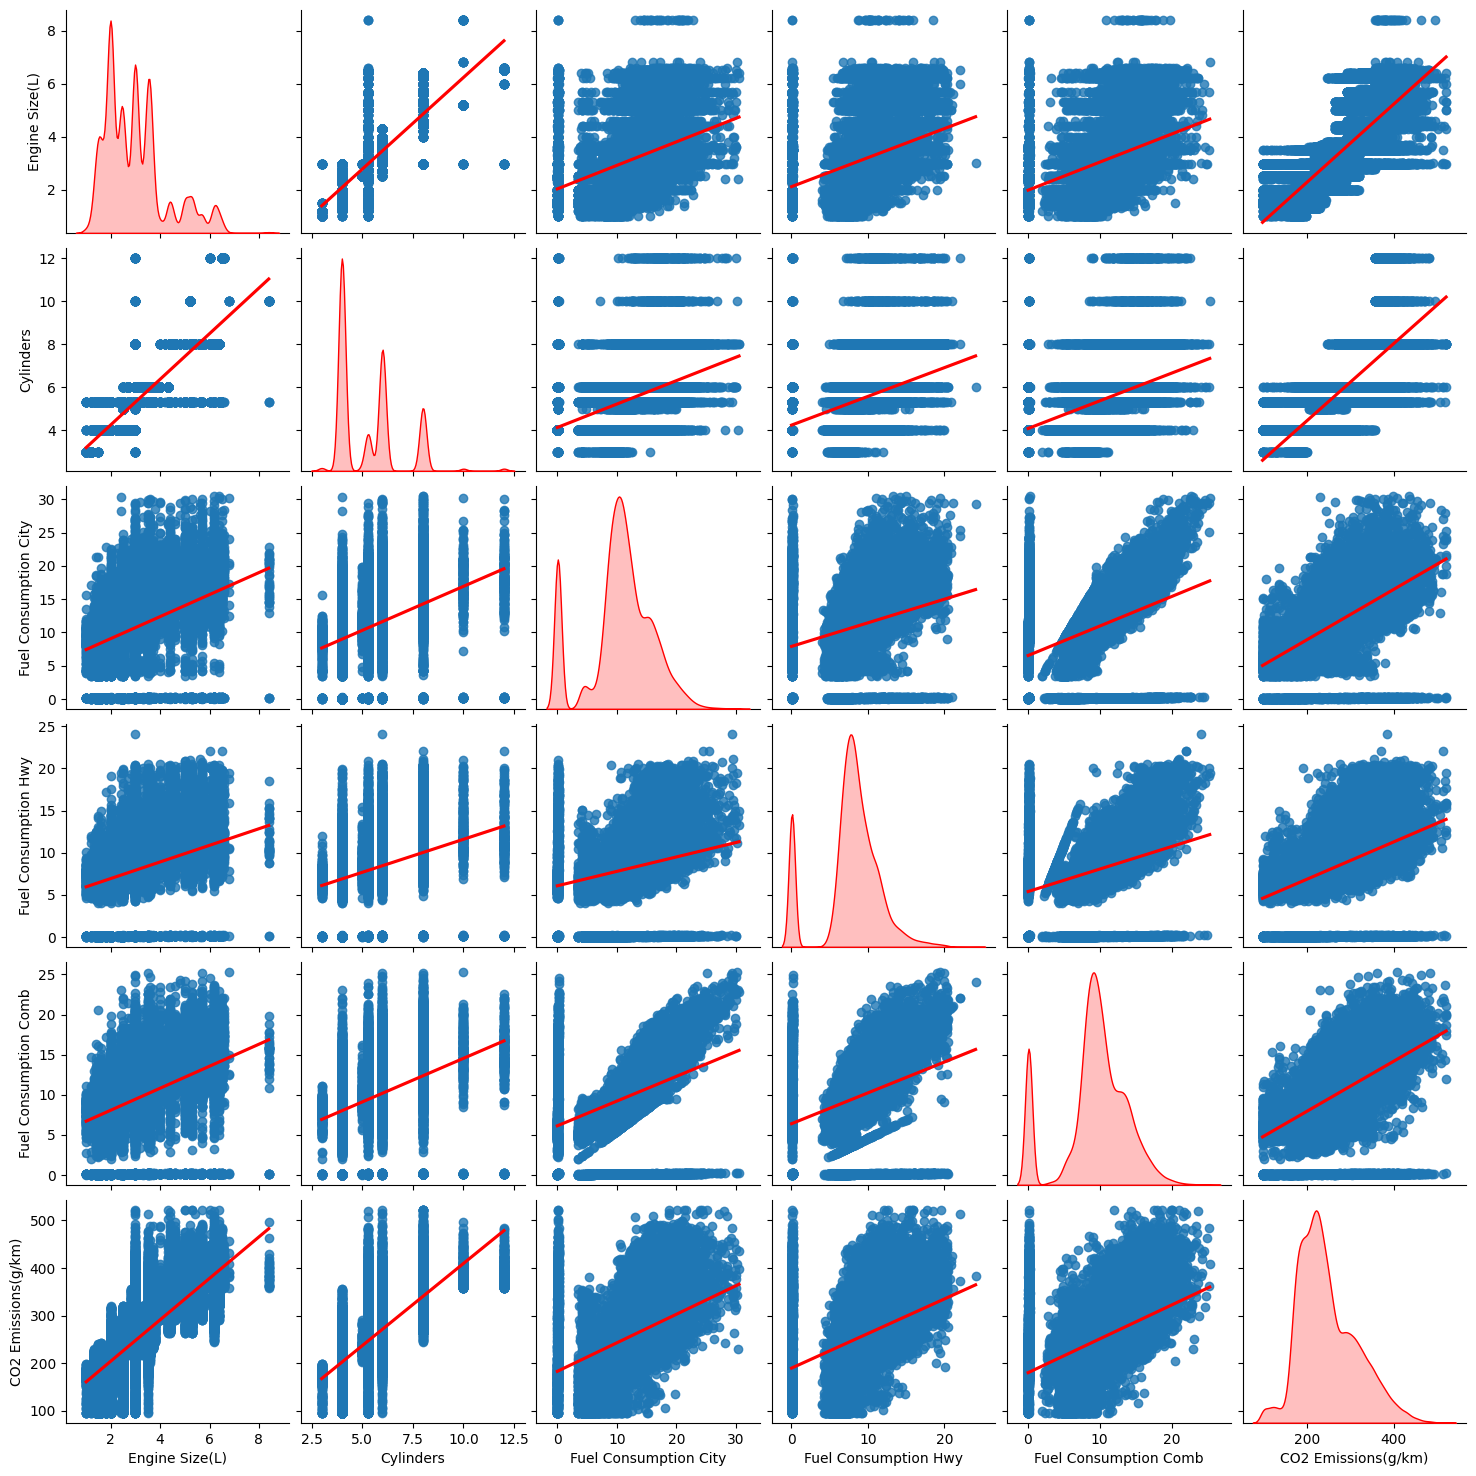

In [481]:
sns.pairplot(df_train, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

#Modelling

Untuk modelling, kami menggunakan kombinasi model random forest dan gradient boost. Penggunaan model ini kami putuskan setelah mencoba berbagai model dan kombinasi model lainnya.

Mengimport library yang dibutuhkan

In [482]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Menentukan parameter untuk random forest dan gradient boost. Kami melakukan hypertuning parameter secara manual.

Model random forest

In [483]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=30, random_state=42, min_samples_split=10, min_samples_leaf=2, bootstrap=True)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=150, random_state=42)

Model gradient boost

In [484]:
gb_model = GradientBoostingRegressor(n_estimators=150, max_depth=10, random_state=42, learning_rate=0.1)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=42)

Prediksi menggunakan model random forest

In [485]:
rf_test_pred = rf_model.predict(X_test_scaled)

Prediksi menggunakan model gradient boost

In [486]:
gb_test_pred = gb_model.predict(X_test_scaled)

Menggabungkan hasil prediksi random forest dan gradient boost

In [487]:
ensemble_test_pred = 0.3 * rf_test_pred + 0.7 * gb_test_pred

In [488]:
ensemble_result_df = pd.DataFrame({'Id': test_id, 'CO2 Emissions(g/km)': ensemble_test_pred})

Menyimpan model ke dalam pickle

In [489]:
import pickle

In [490]:
objects_to_save = {
    'scaler': scaler,
    'rf_model': rf_model,
    'gb_model': gb_model,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'test_id': test_id
}

In [491]:
with open('Americano.pkl', 'wb') as file:
    pickle.dump(objects_to_save, file)

Menyimpan hasil prediksi dalam file CSV

In [492]:
ensemble_result_df.to_csv('prediction_result.csv', index=False)